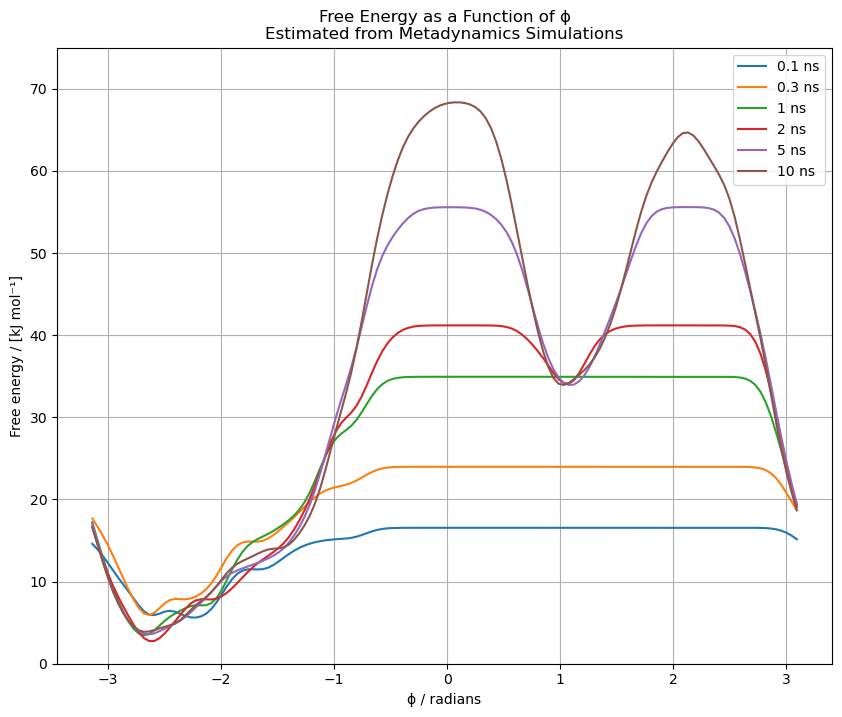

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Define the time points and corresponding file names
time_points = [0.1, 0.3, 1, 2, 5, 10]  # in ns
file_indices = [1, 3, 10, 20, 50, 100]  # Adjust these based on your naming convention

# Initialize a plot
plt.figure(figsize=(10, 8))

# Loop through the specified files and plot the data
for idx, time in zip(file_indices, time_points):
    fes_file = f'fes_{idx}.dat'  # Construct the filename based on the index
    
    # Read the file while skipping initial comment lines
    with open(fes_file, 'r') as file:
        lines = file.readlines()

    # Filter out lines that start with '#'
    filtered_lines = [line for line in lines if not line.startswith('#')]

    # Create a DataFrame from the filtered lines
    fes_data = pd.read_csv(
        StringIO(''.join(filtered_lines)),  # Join the filtered lines into a single string
        delim_whitespace=True,
        header=None,  # No header in the data
        names=['phi', 'psi', 'free_energy', 'der_phi', 'der_psi'],  # Define the columns
    )

    # Extract the columns for plotting (only phi and free_energy)
    phi = fes_data['phi'].to_numpy(dtype=float)
    free_energy = fes_data['free_energy'].to_numpy(dtype=float)

    # Remove duplicates (keeping the first occurrence)
    unique_data = pd.DataFrame({'phi': phi, 'free_energy': free_energy}).drop_duplicates(subset=['phi'])

    # Plot the data with a label for the time point
    plt.plot(unique_data['phi'], unique_data['free_energy'], label=f'{time} ns')

# Customize the plot
plt.xlabel('ϕ / radians')
plt.ylabel('Free energy / [kJ mol⁻¹]')
plt.title('Free Energy as a Function of ϕ\nEstimated from Metadynamics Simulations')
plt.legend()
plt.grid(True)
plt.ylim(0, 75)  # Adjust y-limits if needed for better visibility

# Show the plot
plt.show()
